In [1]:
%matplotlib inline  

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as ply

### Functions to load the images



In [2]:
import os
import struct

"""
Loosely inspired by http://abel.ee.ucla.edu/cvxopt/_downloads/mnist.py
which is GPL licensed.
"""

def read(dataset = "training", path = "."):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels.idx1-ubyte')
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    get_img = lambda idx: (lbl[idx], img[idx])

    # Create an iterator which returns each image in turn
    for i in range(len(lbl)):
        yield get_img(i)

def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    import matplotlib as mpl
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')


### plot first 25 images

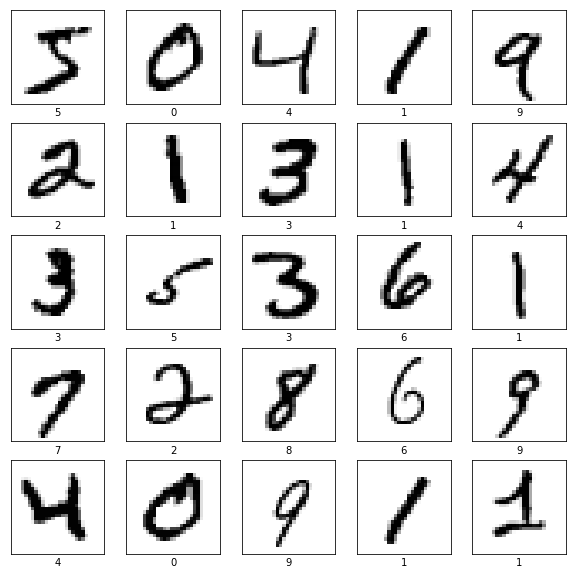

In [15]:
training_data = list(read(dataset='training', path="."))
test_data = list(read(dataset='testing', path="."))

#print 25 first figures
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    label, pixels = training_data[i]    
    imgplot = plt.imshow(pixels, cmap=plt.cm.binary)
    plt.xlabel(label)




### Reorganize the images into n_images x n_pixels array

put labels into own array and rescale image pixels to range [0,1]

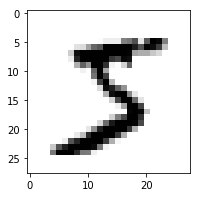

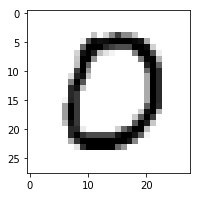

In [16]:
#training data
n_images = len(training_data)
n_pixels = 28*28
training_images = np.zeros((n_images, n_pixels))
training_labels = np.zeros( (n_images,), dtype=np.int8 )

for ii in range(n_images):
    label, pixels = training_data[ii]    
    training_images[ii,:] = np.reshape(pixels, (n_pixels,)) / 255.0
    training_labels[ii] = label

#test data
n_test = len(test_data)
n_pixels = 28*28
test_images = np.zeros((n_test, n_pixels))
test_labels = np.zeros( (n_test,), dtype=np.int8  )

for ii in range(n_test):
    label, pixels = test_data[ii]    
    test_images[ii,:] = np.reshape(pixels, (n_pixels,)) / 255.0
    test_labels[ii] = label

#just make sure it works
plt.figure(figsize=(3,3))
plt.imshow(np.reshape(training_images[0,:], (28,28)), cmap=plt.cm.binary )

#just make sure it works
plt.figure(figsize=(3,3))
plt.imshow(np.reshape(test_images[10,:], (28,28)), cmap=plt.cm.binary )


## Make the neural network

In [ ]:
class nnetwork():
    
    def __init__(self, layers )
        self.nlayers = len(layers)
        self.inlayer = layers[0]
        self.outlayer = layers[-1]
        for ii in range(1,len(layers)-1):
            

### make predictions on random and check how good we get

In [18]:
predictions = np.random.randint(0,9,n_test)

correct = np.zeros(n_test)
for ii in range(n_test):
    if test_labels[ii] == predictions[ii]:
        correct[ii] = 1;
        
        
accuracy = np.sum(correct) / n_test
print("accuracy: {}".format(accuracy))



accuracy: 0.1038


# test tensorflow

In [19]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras


#tell the structure of the network
model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape=(28*28,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


#choose optimisation and the loss function
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


#fit the model
model.fit(training_images, training_labels, epochs=2)


Epoch 1/2
60000/60000 [==============================] - 4s 73us/step - loss: 0.2528 - acc: 0.9279
Epoch 2/2
60000/60000 [==============================] - 4s 70us/step - loss: 0.1101 - acc: 0.9673


### Model has an accuracy of 97%


In [49]:

loss, accuracy = model.evaluate(test_images,test_labels)
print("accuracy: {}".format(accuracy))

10000/10000 [==============================] - 0s 34us/step
accuracy: 0.968


### take a look at some first predictions

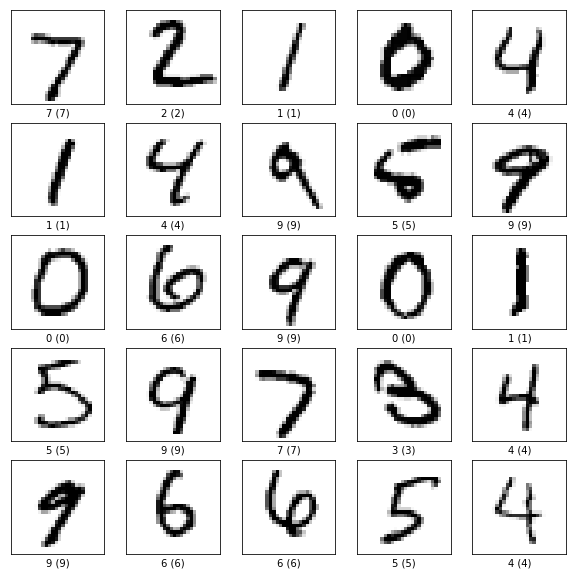

In [28]:
predictions = model.predict(test_images)

#print 25 first figures
plt.figure(figsize=(10,10))
for ii in range(25):
    plt.subplot(5,5,ii+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    label, pixels = test_data[ii]    
    imgplot = plt.imshow(np.reshape(test_images[ii,:], (28,28)), cmap=plt.cm.binary)
    predictlabel = np.argmax(predictions[ii])
    plt.xlabel("{} ({})".format(predictlabel, label))
    

### take a look where the predictions went wrong

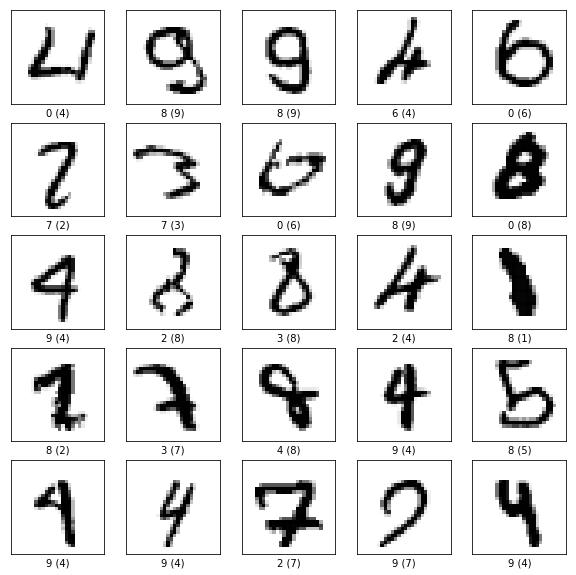

In [50]:
wrong_inds = np.array([], dtype=np.uint8)
 
for ii in range(n_test):
    prediction = np.argmax(predictions[ii])
    
    
    if prediction != test_labels[ii]:
        wrong_inds = np.append(wrong_inds, ii)
        
#look at max 25 wrong
nlook = np.min([len(wrong_inds), 25])
plt.figure(figsize=(10,10))
for ii in range(nlook):
    plt.subplot(5,5,ii+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')  
    ind = wrong_inds[ii]
    imgplot = plt.imshow(np.reshape(test_images[ind,:], (28,28)), cmap=plt.cm.binary)
    predictlabel = np.argmax(predictions[ind])
    plt.xlabel("{} ({})".format(predictlabel, test_labels[ind]))
        


In [43]:
len(test_labels)

10000